In [1]:
#importing dataset
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
#importing dataset
salary=pd.read_csv('Salary_Data.csv')

In [3]:
salary

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
salary.shape

(30, 2)

In [5]:
salary.size

60

In [6]:
salary.describe(percentiles=[.15,.01,.25,.5,.75])

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
1%,1.158000,38198.480000
15%,2.445000,49089.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


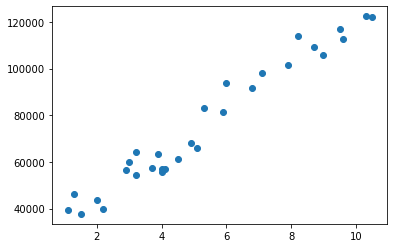

In [7]:
plt.scatter(salary['YearsExperience'],salary['Salary'])

<AxesSubplot:>

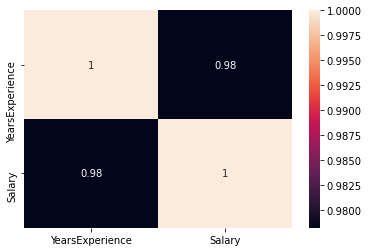

In [8]:
sns.heatmap(salary.corr(),annot=True)

In [9]:
#Feature scaling
x=salary['YearsExperience']
y=salary['Salary']

In [10]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=5)

In [11]:
#working on training data
x_train

21     7.1
28    10.3
0      1.1
17     5.3
5      2.9
1      1.3
27     9.6
12     4.0
20     6.8
19     6.0
24     8.7
7      3.2
4      2.2
8      3.2
9      3.7
16     5.1
22     7.9
6      3.0
15     4.9
14     4.5
3      2.0
Name: YearsExperience, dtype: float64

In [12]:
y_train

21     98273
28    122391
0      39343
17     83088
5      56642
1      46205
27    112635
12     56957
20     91738
19     93940
24    109431
7      54445
4      39891
8      64445
9      57189
16     66029
22    101302
6      60150
15     67938
14     61111
3      43525
Name: Salary, dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
x_train = x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
y_train_pred=np.round(lm.predict(x_train),0)

In [15]:
y_train

array([[ 98273],
       [122391],
       [ 39343],
       [ 83088],
       [ 56642],
       [ 46205],
       [112635],
       [ 56957],
       [ 91738],
       [ 93940],
       [109431],
       [ 54445],
       [ 39891],
       [ 64445],
       [ 57189],
       [ 66029],
       [101302],
       [ 60150],
       [ 67938],
       [ 61111],
       [ 43525]], dtype=int64)

In [16]:
y_train_pred

array([[ 93198.],
       [122952.],
       [ 37410.],
       [ 76462.],
       [ 54147.],
       [ 39270.],
       [116444.],
       [ 64374.],
       [ 90409.],
       [ 82971.],
       [108075.],
       [ 56936.],
       [ 47638.],
       [ 56936.],
       [ 61585.],
       [ 74602.],
       [100637.],
       [ 55076.],
       [ 72743.],
       [ 69024.],
       [ 45778.]])

In [17]:
#Training accuracy
from sklearn.metrics import r2_score
print('r2=',r2_score(y_train,y_train_pred))

r2= 0.9499168523098853


In [18]:
y_test_pred=lm.predict(x_test)

In [19]:
#Testing accuracy
print('r2=',r2_score(y_test,y_test_pred))

r2= 0.9624024983951907


In [20]:
#manually calculating error matrix
n=len(y_train)
mae=sum(y_train-y_train_pred)*1/n

In [21]:
mae

array([0.04761905])

In [22]:
#inbuilt functions for calculating error metrics
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test,y_test_pred)
mse = metrics.mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)

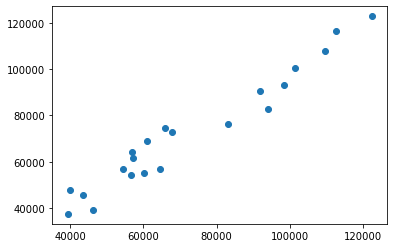

In [23]:
plt.scatter(y_train,y_train_pred)

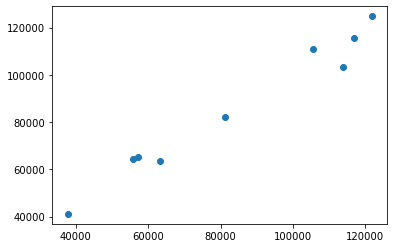

In [24]:
plt.scatter(y_test,y_test_pred)


In [25]:
m, b = np. polyfit(x, y, 1)

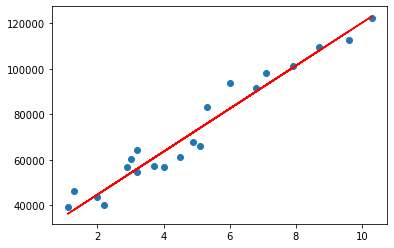

In [26]:
#regression line for training model
plt.scatter(x_train, y_train)
plt.plot(x_train,b  + m*x_train, 'r')
plt.show()



In [27]:
#slope
m

9449.962321455076

In [28]:
#constant
b

25792.20019866868

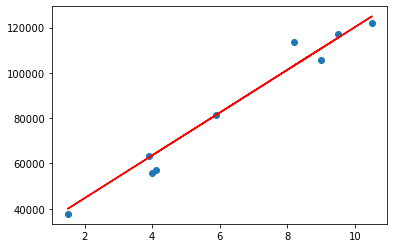

In [29]:
#regression line for testing model
plt.scatter(x_test, y_test)
plt.plot(x_test,b  + m*x_test, 'r')
plt.show()
